In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce
import sys, os
sys.path.insert(0, os.path.abspath('../scripts/'))
import footyviz

# Goal 1 - Liverpool [3] - 0 Bournemouth 

## Loading Data

In [182]:
goal1 = pd.read_csv('../df/goal1.csv')

In [183]:
goal1.head()

,Unnamed: 0,play,bgcolor,dx,dy,edgecolor,frame,player,player_num,team,x,y,z
0,0,Liverpool [3] - 0 Bournemouth,NaN,0.000000,0.000000,NaN,0,0,NaN,NaN,46.394558,11.134454,0.0
1,1,Liverpool [3] - 0 Bournemouth,NaN,0.185745,1.217580,NaN,1,0,NaN,NaN,46.580302,12.352034,0.0
2,2,Liverpool [3] - 0 Bournemouth,NaN,0.178659,1.171133,NaN,2,0,NaN,NaN,46.758961,13.523166,0.0
3,3,Liverpool [3] - 0 Bournemouth,NaN,0.171573,1.124685,NaN,3,0,NaN,NaN,46.930535,14.647852,0.0
4,4,Liverpool [3] - 0 Bournemouth,NaN,0.164488,1.078238,NaN,4,0,NaN,NaN,47.095022,15.726090,0.0


In [184]:
goal1 = goal1[['frame','player','player_num','team','x','y','dx','dy']]

In [185]:
goal1.head()

,frame,player,player_num,team,x,y,dx,dy
0,0,0,NaN,NaN,46.394558,11.134454,0.000000,0.000000
1,1,0,NaN,NaN,46.580302,12.352034,0.185745,1.217580
2,2,0,NaN,NaN,46.758961,13.523166,0.178659,1.171133
3,3,0,NaN,NaN,46.930535,14.647852,0.171573,1.124685
4,4,0,NaN,NaN,47.095022,15.726090,0.164488,1.078238


## Analysis

In [186]:
### Open play - counter-attack

In [187]:
# Mane gets the ball back
# Keita's pass accuracy
# Firmino and Salah start running before Keita receives the ball from Mane
# Firmino's speed! 
# Salah's definition

### General appreciations of the play

In [188]:
# 1. Mane nor Keita passes the ball directly to Salah even though his pitch control is better at the beginning (easier pass)
# 2. Keita's pass is difficult beacuse the moment the ball leaves his foot, Firmino´s pitch control is very slim (frame 2.1).
# 3. Firmino's pitch control only gets better as Keita's pass is in the air.
# 3. Salah keeps going to the center lain at every moment of the play until he gets the ball from Firmino. This puts him in a
# great position to score.
# 4. Looks like the team knows that attacking from the center lane has a better chance of ending in goal than attacking from the
# sides, even though attacking from the right would have been easier (a pass to Salah would have been easier at the beginning of
# the play as his pitch control was better that Firmino's).

### What situations are we trying to understand with data analytics that can be useful in an opposition analysis?

In [189]:
### 1. Does Firmino start running/sprinting even before Keita touches the ball? If so, this can be an indicator that he was
### expecting a through ball and that this is a team automatism during counter-attacks to play the ball forward as quick as
### possible.
### 2. One option to try to beat Firmino or Salah if you are a Boursmouth's defender in this situation is to anticipate the
### through ball and sprint to your goal before they do, otherwise they will outrun you.
### 3. Liverpool prefers to attack in the center lane rather than the sides because they know that, generally speaking, their
### shots will have a higher xG.

### Analytics-driven opposition analysis

### 1. Does Firmino start running/sprinting even before Keita touches the ball?

In [190]:
goal1.head()

,frame,player,player_num,team,x,y,dx,dy
0,0,0,NaN,NaN,46.394558,11.134454,0.000000,0.000000
1,1,0,NaN,NaN,46.580302,12.352034,0.185745,1.217580
2,2,0,NaN,NaN,46.758961,13.523166,0.178659,1.171133
3,3,0,NaN,NaN,46.930535,14.647852,0.171573,1.124685
4,4,0,NaN,NaN,47.095022,15.726090,0.164488,1.078238


In [191]:
len(goal1.frame.unique())

155

In [192]:
goal1.player.unique()

array([   0,   14,  331,  471,  472,  549,  648,  876,  877,  878,  893,
        894, 1066, 1067, 1068, 1069, 1070, 1492, 5518], dtype=int64)

In [193]:
goal1[goal1['team']=='defense']['player'].unique()

array([ 549,  893,  894, 1066, 1067, 1068, 1069, 1070, 1492, 5518],
      dtype=int64)

In [194]:
goal1[(goal1['team']=='defense')&(goal1['frame']==0)]

,frame,player,player_num,team,x,y,dx,dy
775,0,549,NaN,defense,94.228656,45.575012,0.0,0.0
1550,0,893,NaN,defense,40.544218,36.344538,0.0,0.0
1705,0,894,NaN,defense,40.911253,5.593784,0.0,0.0
1860,0,1066,NaN,defense,56.054422,12.184874,0.0,0.0
2015,0,1067,NaN,defense,48.843537,16.176471,0.0,0.0
2170,0,1068,NaN,defense,55.646259,41.596639,0.0,0.0
2325,0,1069,NaN,defense,53.469388,7.142857,0.0,0.0
2480,0,1070,NaN,defense,50.612245,10.714286,0.0,0.0
2635,0,1492,NaN,defense,45.641096,11.268174,0.0,0.0
2790,0,5518,NaN,defense,41.732328,13.931149,0.0,0.0


In [195]:
goal1_0 = goal1[goal1['player']==0] ## ball
goal1_0 = goal1_0.rename(columns={'player':'player_0','x':'x_ball','y':'y_ball','dx':'dx_ball','dy':'dy_ball'})
goal1_0['player_0'] = 'ball'

In [196]:
goal1_14 = goal1[goal1['player']==14] ## Firmino
goal1_14 = goal1_14.rename(columns={'player':'player_1','x':'x_firmino','y':'y_firmino','dx':'dx_firmino','dy':'dy_firmino'})
goal1_14['player_1'] = 'Firmino'

In [197]:
goal1_331 = goal1[goal1['player']==331] ## Salah
goal1_331 = goal1_331.rename(columns={'player':'player_2','x':'x_salah','y':'y_salah','dx':'dx_salah','dy':'dy_salah'})
goal1_331['player_2'] = 'Salah'

In [198]:
goal1_472 = goal1[goal1['player']==472] ## Keita
goal1_472 = goal1_472.rename(columns={'player':'player_3','x':'x_keita','y':'y_keita','dx':'dx_keita','dy':'dy_keita'})
goal1_472['player_3'] = 'Keita'

In [199]:
goal1_1066 = goal1[goal1['player']==1066] ## Player nexto to Firmino
goal1_1066 = goal1_1066.rename(columns={'player':'player_5','x':'x_df1','y':'y_df1','dx':'dx_df1','dy':'dy_df1'})
goal1_1066['player_5'] = 'DF1'

In [200]:
goal1_1069 = goal1[goal1['player']==1069] ## Player nexto to Salah
goal1_1069 = goal1_1069.rename(columns={'player':'player_6','x':'x_df2','y':'y_df2','dx':'dx_df2','dy':'dy_df2'}) 
goal1_1069['player_6'] = 'DF2'

In [201]:
df = [goal1_0,goal1_14,goal1_331,goal1_472,goal1_1066,goal1_1069]

In [202]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['frame'],how='outer'), df)

In [203]:
df.head()

,frame,player_0,player_num_x,team_x,x_ball,y_ball,dx_ball,dy_ball,player_1,player_num_y,...,y_df1,dx_df1,dy_df1,player_6,player_num_y,team_y,x_df2,y_df2,dx_df2,dy_df2
0,0,ball,NaN,NaN,46.394558,11.134454,0.000000,0.000000,Firmino,9.0,...,12.184874,0.000000,0.000000,DF2,NaN,defense,53.469388,7.142857,0.000000,0.000000
1,1,ball,NaN,NaN,46.580302,12.352034,0.185745,1.217580,Firmino,9.0,...,12.489275,0.015997,0.304401,DF2,NaN,defense,53.468501,7.271172,-0.000886,0.128314
2,2,ball,NaN,NaN,46.758961,13.523166,0.178659,1.171133,Firmino,9.0,...,12.790564,0.025840,0.301289,DF2,NaN,defense,53.477351,7.398606,0.008850,0.127435
3,3,ball,NaN,NaN,46.930535,14.647852,0.171573,1.124685,Firmino,9.0,...,13.088815,0.035391,0.298251,DF2,NaN,defense,53.495814,7.525233,0.018463,0.126627
4,4,ball,NaN,NaN,47.095022,15.726090,0.164488,1.078238,Firmino,9.0,...,13.384102,0.044650,0.295287,DF2,NaN,defense,53.523768,7.651125,0.027954,0.125892


In [204]:
df.columns

Index(['frame', 'player_0', 'player_num_x', 'team_x', 'x_ball', 'y_ball',
       'dx_ball', 'dy_ball', 'player_1', 'player_num_y', 'team_y', 'x_firmino',
       'y_firmino', 'dx_firmino', 'dy_firmino', 'player_2', 'player_num_x',
       'team_x', 'x_salah', 'y_salah', 'dx_salah', 'dy_salah', 'player_3',
       'player_num_y', 'team_y', 'x_keita', 'y_keita', 'dx_keita', 'dy_keita',
       'player_5', 'player_num_x', 'team_x', 'x_df1', 'y_df1', 'dx_df1',
       'dy_df1', 'player_6', 'player_num_y', 'team_y', 'x_df2', 'y_df2',
       'dx_df2', 'dy_df2'],
      dtype='object')

In [205]:
df = df.drop(['player_num_x','team_x','player_num_y','team_y'],1)

In [206]:
df.columns

Index(['frame', 'player_0', 'x_ball', 'y_ball', 'dx_ball', 'dy_ball',
       'player_1', 'x_firmino', 'y_firmino', 'dx_firmino', 'dy_firmino',
       'player_2', 'x_salah', 'y_salah', 'dx_salah', 'dy_salah', 'player_3',
       'x_keita', 'y_keita', 'dx_keita', 'dy_keita', 'player_5', 'x_df1',
       'y_df1', 'dx_df1', 'dy_df1', 'player_6', 'x_df2', 'y_df2', 'dx_df2',
       'dy_df2'],
      dtype='object')

In [207]:
df.head()

,frame,player_0,x_ball,y_ball,dx_ball,dy_ball,player_1,x_firmino,y_firmino,dx_firmino,...,player_5,x_df1,y_df1,dx_df1,dy_df1,player_6,x_df2,y_df2,dx_df2,dy_df2
0,0,ball,46.394558,11.134454,0.000000,0.000000,Firmino,51.564626,9.033613,0.000000,...,DF1,56.054422,12.184874,0.000000,0.000000,DF2,53.469388,7.142857,0.000000,0.000000
1,1,ball,46.580302,12.352034,0.185745,1.217580,Firmino,51.669950,9.451634,0.105324,...,DF1,56.070419,12.489275,0.015997,0.304401,DF2,53.468501,7.271172,-0.000886,0.128314
2,2,ball,46.758961,13.523166,0.178659,1.171133,Firmino,51.784284,9.860491,0.114334,...,DF1,56.096259,12.790564,0.025840,0.301289,DF2,53.477351,7.398606,0.008850,0.127435
3,3,ball,46.930535,14.647852,0.171573,1.124685,Firmino,51.907433,10.260422,0.123149,...,DF1,56.131649,13.088815,0.035391,0.298251,DF2,53.495814,7.525233,0.018463,0.126627
4,4,ball,47.095022,15.726090,0.164488,1.078238,Firmino,52.039201,10.651667,0.131768,...,DF1,56.176299,13.384102,0.044650,0.295287,DF2,53.523768,7.651125,0.027954,0.125892


In [208]:
df[df['x_ball']==df['x_keita']]

,frame,player_0,x_ball,y_ball,dx_ball,dy_ball,player_1,x_firmino,y_firmino,dx_firmino,...,player_5,x_df1,y_df1,dx_df1,dy_df1,player_6,x_df2,y_df2,dx_df2,dy_df2
22,22,ball,48.844160,27.191910,0.036946,0.242189,Firmino,55.662503,16.481651,0.253548,...,DF1,58.231293,18.277311,0.161508,0.254663,DF2,55.510204,9.873950,0.177838,0.125031
23,23,ball,49.007895,27.268534,0.163735,0.076624,Firmino,55.920963,16.753342,0.258460,...,DF1,58.396525,18.530424,0.165233,0.253113,DF2,55.695204,9.999620,0.185000,0.125670
24,24,ball,49.171281,27.345029,0.163386,0.076495,Firmino,56.184139,17.021134,0.263176,...,DF1,58.565191,18.782061,0.168666,0.251637,DF2,55.887245,10.126001,0.192041,0.126382
25,25,ball,49.334107,27.421318,0.162826,0.076289,Firmino,56.451836,17.285267,0.267697,...,DF1,58.736999,19.032296,0.171808,0.250235,DF2,56.086203,10.253167,0.198958,0.127166
26,26,ball,49.496163,27.497323,0.162057,0.076005,Firmino,56.723860,17.545980,0.272023,...,DF1,58.911658,19.281204,0.174659,0.248908,DF2,56.291957,10.381189,0.205753,0.128022
27,27,ball,49.657241,27.572966,0.161077,0.075643,Firmino,57.000014,17.803512,0.276154,...,DF1,59.088876,19.528859,0.177218,0.247655,DF2,56.504383,10.510140,0.212426,0.128951
28,28,ball,49.817129,27.648171,0.159888,0.075205,Firmino,57.280104,18.058103,0.280090,...,DF1,59.268362,19.775336,0.179486,0.246477,DF2,56.723359,10.640092,0.218976,0.129952
29,29,ball,49.975618,27.722859,0.158489,0.074688,Firmino,57.563934,18.309993,0.283830,...,DF1,59.449825,20.020708,0.181463,0.245373,DF2,56.948763,10.771117,0.225404,0.131025
30,30,ball,50.132498,27.796954,0.156880,0.074095,Firmino,57.851309,18.559420,0.287376,...,DF1,59.632974,20.265051,0.183148,0.244343,DF2,57.180471,10.903288,0.231709,0.132171
31,31,ball,50.287560,27.870378,0.155062,0.073424,Firmino,58.142035,18.806624,0.290726,...,DF1,59.817516,20.508439,0.184543,0.243388,DF2,57.418363,11.036677,0.237891,0.133389


In [209]:
# Keita gets the ball in frame 22 and keeps it until frame 42.
# Know, let's see if Firmino starts running to the opponent's goal before Keita receives the pass from Mane.

In [210]:
df[df['x_ball']==df['x_firmino']]

,frame,player_0,x_ball,y_ball,dx_ball,dy_ball,player_1,x_firmino,y_firmino,dx_firmino,...,player_5,x_df1,y_df1,dx_df1,dy_df1,player_6,x_df2,y_df2,dx_df2,dy_df2
108,108,ball,85.565258,30.767056,0.158842,0.010144,Firmino,85.565258,30.767056,0.269455,...,DF1,85.329813,31.943877,0.343453,-0.064648,DF2,82.713995,27.77506,0.327177,0.274972


In [211]:
# Firmino gets he ball in frame 108

In [212]:
# Lets see how Firmino's speed changes thrgough the play

In [213]:
# To calculate players' speed lets transform a little bit our dataframe.

In [214]:
df['time [s]'] = (df.index)*1/20

In [262]:
df.head()

,frame,player_0,x_ball,y_ball,dx_ball,dy_ball,player_1,x_firmino,y_firmino,dx_firmino,...,x_df1,y_df1,dx_df1,dy_df1,player_6,x_df2,y_df2,dx_df2,dy_df2,time [s]
0,0,ball,46.394558,11.134454,0.000000,0.000000,Firmino,51.564626,9.033613,0.000000,...,56.054422,12.184874,0.000000,0.000000,DF2,53.469388,7.142857,0.000000,0.000000,0.00
1,1,ball,46.580302,12.352034,0.185745,1.217580,Firmino,51.669950,9.451634,0.105324,...,56.070419,12.489275,0.015997,0.304401,DF2,53.468501,7.271172,-0.000886,0.128314,0.05
2,2,ball,46.758961,13.523166,0.178659,1.171133,Firmino,51.784284,9.860491,0.114334,...,56.096259,12.790564,0.025840,0.301289,DF2,53.477351,7.398606,0.008850,0.127435,0.10
3,3,ball,46.930535,14.647852,0.171573,1.124685,Firmino,51.907433,10.260422,0.123149,...,56.131649,13.088815,0.035391,0.298251,DF2,53.495814,7.525233,0.018463,0.126627,0.15
4,4,ball,47.095022,15.726090,0.164488,1.078238,Firmino,52.039201,10.651667,0.131768,...,56.176299,13.384102,0.044650,0.295287,DF2,53.523768,7.651125,0.027954,0.125892,0.20


In [263]:
speed = df[['frame','time [s]','dx_ball','dy_ball','dx_firmino','dy_firmino','dx_salah','dy_salah','dx_keita','dy_keita','dx_df1','dy_df1','dx_df2','dy_df2']]

In [265]:
speed_firmino = speed[['frame','time [s]','dx_firmino','dy_firmino']]

In [218]:
speed_firmino.head()

,frame,time [s],dx_firmino,dy_firmino
0,0,0.00,0.000000,0.000000
1,1,0.05,0.105324,0.418021
2,2,0.10,0.114334,0.408856
3,3,0.15,0.123149,0.399931
4,4,0.20,0.131768,0.391245


In [266]:
speed_firmino['dt'] = speed_firmino['time [s]'].diff()

C:\Users\DELUX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [267]:
speed_firmino.head()

,frame,time [s],dx_firmino,dy_firmino,dt
0,0,0.00,0.000000,0.000000,NaN
1,1,0.05,0.105324,0.418021,0.05
2,2,0.10,0.114334,0.408856,0.05
3,3,0.15,0.123149,0.399931,0.05
4,4,0.20,0.131768,0.391245,0.05


In [268]:
speed_firmino['vx'] = speed_firmino['dx_firmino'] / speed_firmino['dt']
speed_firmino['vy'] = speed_firmino['dy_firmino'] / speed_firmino['dt']
speed_firmino['v_firmino'] = np.sqrt( speed_firmino['vx']**2 + speed_firmino['vy']**2 )

C:\Users\DELUX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELUX\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELUX\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [269]:
speed_firmino.head()

,frame,time [s],dx_firmino,dy_firmino,dt,vx,vy,v_firmino
0,0,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN
1,1,0.05,0.105324,0.418021,0.05,2.106480,8.360419,8.621709
2,2,0.10,0.114334,0.408856,0.05,2.286680,8.177125,8.490835
3,3,0.15,0.123149,0.399931,0.05,2.462977,7.998618,8.369238
4,4,0.20,0.131768,0.391245,0.05,2.635369,7.824899,8.256768


In [270]:
speed_firmino['v_firmino'].max()

10.266417072852338

In [271]:
speed_firmino['segundo'] = speed_firmino['frame'] * 0.05

C:\Users\DELUX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [272]:
speed_firmino = speed_firmino[['segundo','v_firmino']]

In [273]:
# Let's see Firmino's velocity before Keita gets the ball.

In [275]:
#speed_firmino[df['frame']<42][['frame','v_firmino']].head()

In [276]:
# Know lets see Firmino's speed during Keita possession of the ball.

In [228]:
speed_firmino[(speed_firmino['frame']>=22)&(speed_firmino['frame']<=42)][['frame','v_firmino']].head()

,frame,v_firmino
22,22,7.493155
23,23,7.499800
24,24,7.509312
25,25,7.521385
26,26,7.535727


In [229]:
# Finally lets see Firmino's velocity after Keita makes the pass and just before he gets the ball.

In [230]:
speed_firmino[(speed_firmino['frame']>42)&(speed_firmino['frame']<108)][['frame','v_firmino']].head()

,frame,v_firmino
43,43,7.922554
44,44,7.951227
45,45,7.984662
46,46,8.022864
47,47,8.065838


In [231]:
# Lets plot this 

C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


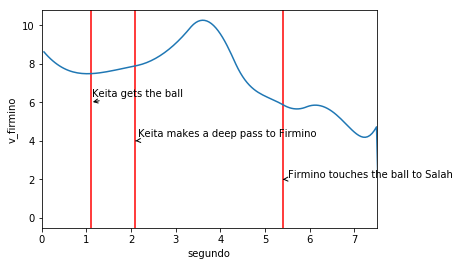

In [280]:
plt.xlim(0, 7.5)
plt.axvline(1.1,c='r')
plt.axvline(2.1,c='r')
plt.axvline(5.4,c='r')
plt.annotate('Keita gets the ball', 
             xy=(1.1, 6),  
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))
plt.annotate('Keita makes a deep pass to Firmino', 
             xy=(2.1, 4),  
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))
plt.annotate('Firmino touches the ball to Salah', 
             xy=(5.4, 2),  
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))
sns.lineplot(x='segundo', y='v_firmino', data=speed_firmino);

In [233]:
# -Firmino's speed through the play shows that he is sprinting most of the play (speed > 7 m/s), even before Keita gets the ball
# from Mane.
# -He reaches his maximum speed to get to the ball. 

 
### 2. One option to try to beat Firmino or Salah if you are a Boursmouth's defender in this situation is to anticipate the through ball and sprint to your goal before they do, otherwise they will outrun you.

In [234]:
# Lets compare Firmino's speed to the defender next to him.

In [235]:
speed_df1 = speed[['frame','time [s]','dx_df1','dy_df1']]

In [236]:
speed_df1['dt'] = speed_df1['time [s]'].diff()

C:\Users\DELUX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [237]:
speed_df1.head()

,frame,time [s],dx_df1,dy_df1,dt
0,0,0.00,0.000000,0.000000,NaN
1,1,0.05,0.015997,0.304401,0.05
2,2,0.10,0.025840,0.301289,0.05
3,3,0.15,0.035391,0.298251,0.05
4,4,0.20,0.044650,0.295287,0.05


In [238]:
speed_df1['vx'] = speed_df1['dx_df1'] / speed_df1['dt']
speed_df1['vy'] = speed_df1['dy_df1'] / speed_df1['dt']
speed_df1['v_df1'] = np.sqrt( speed_df1['vx']**2 + speed_df1['vy']**2 )

C:\Users\DELUX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELUX\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELUX\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [239]:
speed_df1.head()

,frame,time [s],dx_df1,dy_df1,dt,vx,vy,v_df1
0,0,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN
1,1,0.05,0.015997,0.304401,0.05,0.319948,6.088020,6.096421
2,2,0.10,0.025840,0.301289,0.05,0.516792,6.025775,6.047896
3,3,0.15,0.035391,0.298251,0.05,0.707810,5.965018,6.006866
4,4,0.20,0.044650,0.295287,0.05,0.893002,5.905749,5.972883


In [247]:
speed_df1['segundo'] = speed_df1['frame']  * 0.05

In [248]:
speed_df1.tail()

,frame,v_df1,segundo
150,150,5.347288,7.50
151,151,0.000000,7.55
152,152,0.000000,7.60
153,153,0.000000,7.65
154,154,0.000000,7.70


In [249]:
speed_df1['v_df1'].max()

11.066111977826587

In [250]:
speed_df1 = speed_df1[['segundo','v_df1']]

C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\DELUX\Anaconda3\li

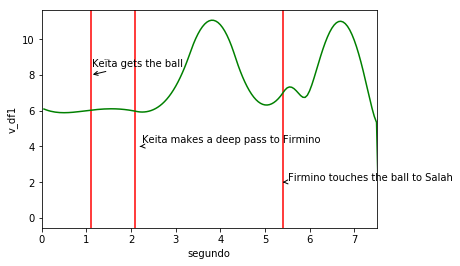

In [283]:
plt.xlim(0, 7.5)
plt.axvline(1.1,c='r')
plt.axvline(2.1,c='r')
plt.axvline(5.4,c='r')
plt.annotate('Keïta gets the ball', 
             xy=(1.1, 8),  
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))
plt.annotate('Keita makes a deep pass to Firmino', 
             xy=(2.2, 4),  
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))
plt.annotate('Firmino touches the ball to Salah', 
             xy=(5.4, 2),  
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))
sns.lineplot(x='segundo', y='v_df1', data=speed_df1,c='g');

C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


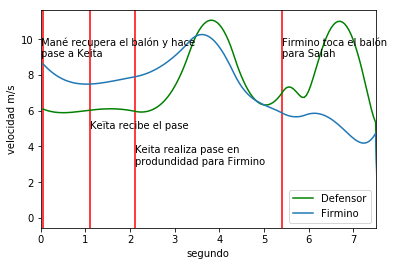

In [308]:
plt.xlim(0, 7.5)
plt.axvline(0.05,c='r')
plt.axvline(1.1,c='r')
plt.axvline(2.1,c='r')
plt.axvline(5.4,c='r')
plt.annotate('Mané recupera el balón y hace\npase a Keita', 
             xy=(0, 9),  
             xycoords='data')
plt.annotate('Keïta recibe el pase', 
             xy=(1.1, 5),  
             xycoords='data')
plt.annotate('Keita realiza pase en\nprodundidad para Firmino', 
             xy=(2.1, 3),  
             xycoords='data')
plt.annotate('Firmino toca el balón\npara Salah', 
             xy=(5.4, 9),  
             xycoords='data')

ax1 = sns.lineplot(x='segundo', y='v_df1', data=speed_df1,c='g',label='Defensor')
ax2 = sns.lineplot(x='segundo', y='v_firmino', data=speed_firmino,label='Firmino')
ax2.set(ylabel='velocidad m/s');

plt.savefig('velocidad.png')

In [90]:
# -The defender next to Firmino is slower than him during the first half of the play (the defender is in fact running not
# sprinting (between 4 m/s and 7 m/s) most part of the first half of the play)
# -It seems that the defender only accelerates when he realizes that Firmino will get to the ball. 
# -The defender reacts to the situation. A different approach could have been to accelerate in anticipation to Keita's through
# ball.

In [91]:
speed_df1.head()

,frame,v_df1
0,0,NaN
1,1,6.096421
2,2,6.047896
3,3,6.006866
4,4,5.972883


In [92]:
speed_firmino.head()

,frame,v_firmino
0,0,NaN
1,1,8.621709
2,2,8.490835
3,3,8.369238
4,4,8.256768


In [93]:
# Now let's see the evolution of the distance between Firmino and the defender through the play.

In [289]:
x_dist = pd.merge(goal1_14,goal1_1066,on='frame',how='left')

In [290]:
x_dist.head()

,frame,player_1,player_num_x,team_x,x_firmino,y_firmino,dx_firmino,dy_firmino,player_5,player_num_y,team_y,x_df1,y_df1,dx_df1,dy_df1
0,0,Firmino,9.0,attack,51.564626,9.033613,0.000000,0.000000,DF1,NaN,defense,56.054422,12.184874,0.000000,0.000000
1,1,Firmino,9.0,attack,51.669950,9.451634,0.105324,0.418021,DF1,NaN,defense,56.070419,12.489275,0.015997,0.304401
2,2,Firmino,9.0,attack,51.784284,9.860491,0.114334,0.408856,DF1,NaN,defense,56.096259,12.790564,0.025840,0.301289
3,3,Firmino,9.0,attack,51.907433,10.260422,0.123149,0.399931,DF1,NaN,defense,56.131649,13.088815,0.035391,0.298251
4,4,Firmino,9.0,attack,52.039201,10.651667,0.131768,0.391245,DF1,NaN,defense,56.176299,13.384102,0.044650,0.295287


In [296]:
x_dist = x_dist[['frame','x_firmino','x_df1']]

In [297]:
x_dist['diff [m]'] = x_dist['x_firmino']-x_dist['x_df1']

In [298]:
x_dist['segundo'] = x_dist['frame'] * 0.05

C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


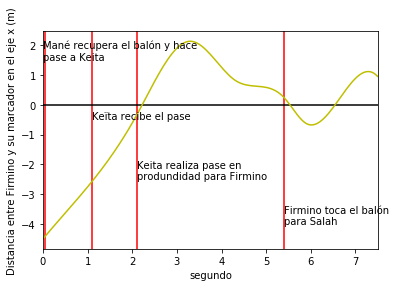

In [307]:
plt.xlim(0, 7.5)
plt.axvline(0.05,c='r')
plt.axvline(1.1,c='r')
plt.axvline(2.1,c='r')
plt.axvline(5.4,c='r')
plt.axhline(0,c='k')
plt.annotate('Mané recupera el balón y hace\npase a Keita', 
             xy=(0, 1.5),  
             xycoords='data')
plt.annotate('Keïta recibe el pase', 
             xy=(1.1, -0.5),  
             xycoords='data')
plt.annotate('Keita realiza pase en\nprodundidad para Firmino', 
             xy=(2.1, -2.5),  
             xycoords='data')
plt.annotate('Firmino toca el balón\npara Salah', 
             xy=(5.4, -4),  
             xycoords='data')
ax1 = sns.lineplot(x='segundo', y='diff [m]', data=x_dist,c='y')
ax1.set(ylabel='Distancia entre Firmino y su marcador en el eje x (m)');
plt.savefig('ditancia.png')

In [ ]:
# Firmino is able to recover a 4.5 meter disadvantage from the star of the play to get ahead of the defender in the x-axis
# (suposing the field measures 100m long)

### 3. Liverpool prefers to attack in the center lane rather than the sides because they know that, generally speaking, their shots will have a higher xG.

In [65]:
data = pd.read_csv('../datasets/positional_data/liverpool_2019.csv', index_col=('play', 'frame'))

In [66]:
play = 'Liverpool [3] - 0 Bournemouth'
df = data.loc[play]

C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


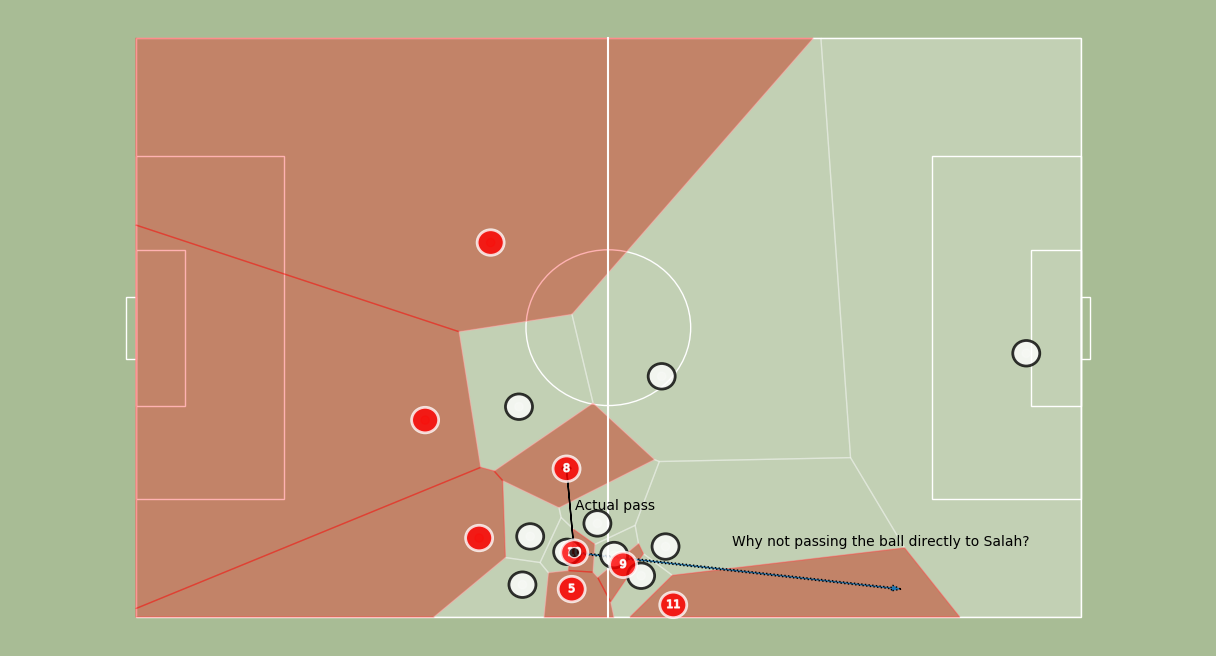

In [184]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=0)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
fig, ax.arrow(46.394558, 11.134454, 45.578231-46.394558,25.630252-11.134454, head_width=1, head_length=1)
fig, ax.arrow(46.394558, 11.134454, 80-46.394558,5-11.134454, head_width=1, head_length=1,width=0.25,ls=':')
plt.annotate('Actual pass', 
             xy=(40.5, 15),  
             xycoords='data',
             textcoords='offset points')
plt.annotate('Why not passing the ball directly to Salah?', 
             xy=(55, 10),  
             xycoords='data',
             textcoords='offset points');

In [188]:
goal1[goal1['frame']==108]

,frame,player,player_num,team,x,y,dx,dy
108,108,0,NaN,NaN,85.565258,30.767056,0.158842,0.010144
263,108,14,9.0,attack,85.565258,30.767056,0.269455,-0.117997
418,108,331,11.0,attack,83.149215,28.410904,0.317600,0.458513
573,108,471,10.0,attack,70.881328,22.582628,0.178158,0.246901
728,108,472,8.0,attack,59.047619,32.142857,0.169672,0.066241
883,108,549,NaN,defense,96.384515,45.068906,0.100622,0.015396
1038,108,648,NaN,attack,72.433371,64.671110,0.375206,-0.056351
1193,108,876,5.0,attack,57.648682,11.129361,0.097889,0.047674
1348,108,877,NaN,attack,36.326531,13.655462,0.000000,0.000000
1503,108,878,NaN,attack,30.612245,34.033613,0.000000,0.000000


In [68]:
# When Mane gets the ball back he has the chance to pass the ball to Salah who is prepared to run in the right side of the
# pitch, instead he prefers to pass the ball to Keita who is in the center lane.

C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "
C:\Users\DELUX\Anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


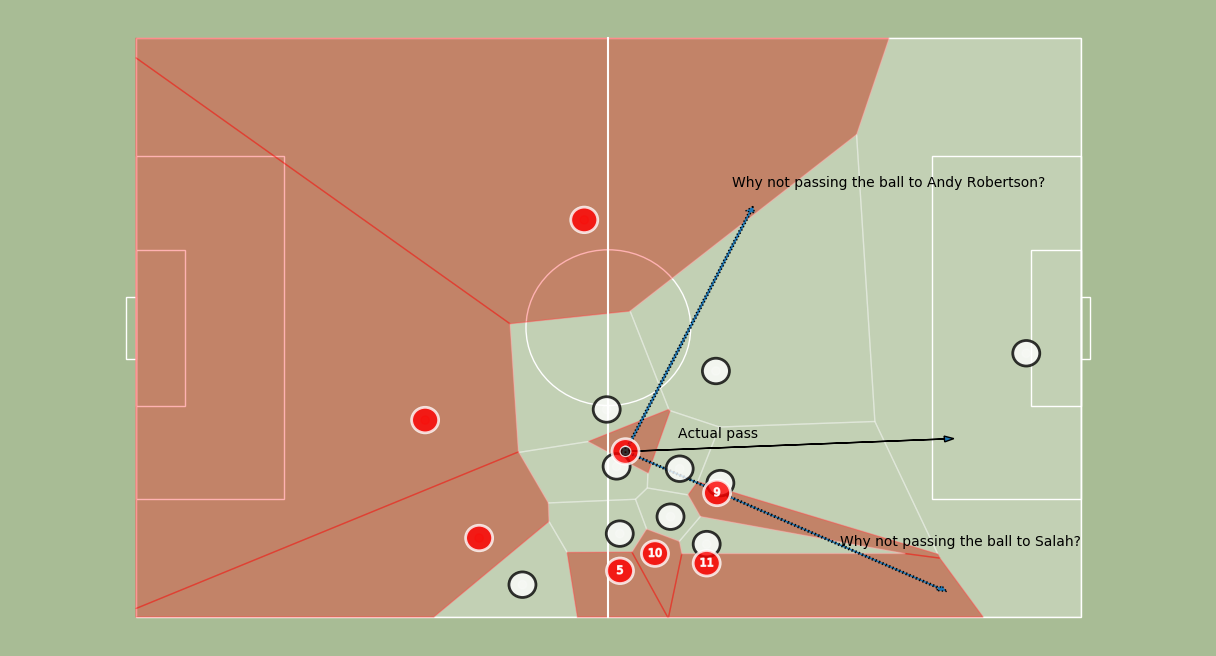

In [206]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=2.1)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
fig, ax.arrow(51.813185,28.611598,85.565258-51.813185,30.767056-28.611598, head_width=1, head_length=1)
fig, ax.arrow(51.813185, 28.611598, 85-51.813185,5-28.611598, head_width=1, head_length=1,width=0.25,ls=':')
fig, ax.arrow(51.813185, 28.611598, 65-51.813185,70-28.611598, head_width=1, head_length=1,width=0.25,ls=':')
plt.annotate('Actual pass', 
             xy=(50, 25),  
             xycoords='data',
             textcoords='offset points')
plt.annotate('Why not passing the ball to Salah?', 
             xy=(65, 10),  
             xycoords='data',
             textcoords='offset points')
plt.annotate('Why not passing the ball to Andy Robertson?', 
             xy=(55, 60),  
             xycoords='data',
             textcoords='offset points');

In [70]:
# The moment Keita makes the pass to Firmino, both Salah and the player on the left side of the pitch are in a better position
# to receive the ball (their individual pitch control is far better than Firmino's). Nontheless, Keita prefers to pass the
# ball to Firmino to the center lane, knowing that he will outrun the defender next to him and create a great opportunity to
# score.

In [ ]:
# Let's see the ball's trajectory.

In [222]:
# We know that playing in the center lane and inside the box increases the xG of the shots taken from those locations. 
# Judging by this play, it seems that Liverpool knows that, as they prefer to try a riskier plays that would bring the ball into
# a danger zone than to try a safer plays that would lower the probabilities of scoring. 
# Note how Salah (light blue) keeps going to the center lain at every moment of the play.

# *the pitch image was taken from https://2plus2equals11.com/tag/network-analysis-2/
# *the graph was plotted in Tableau.

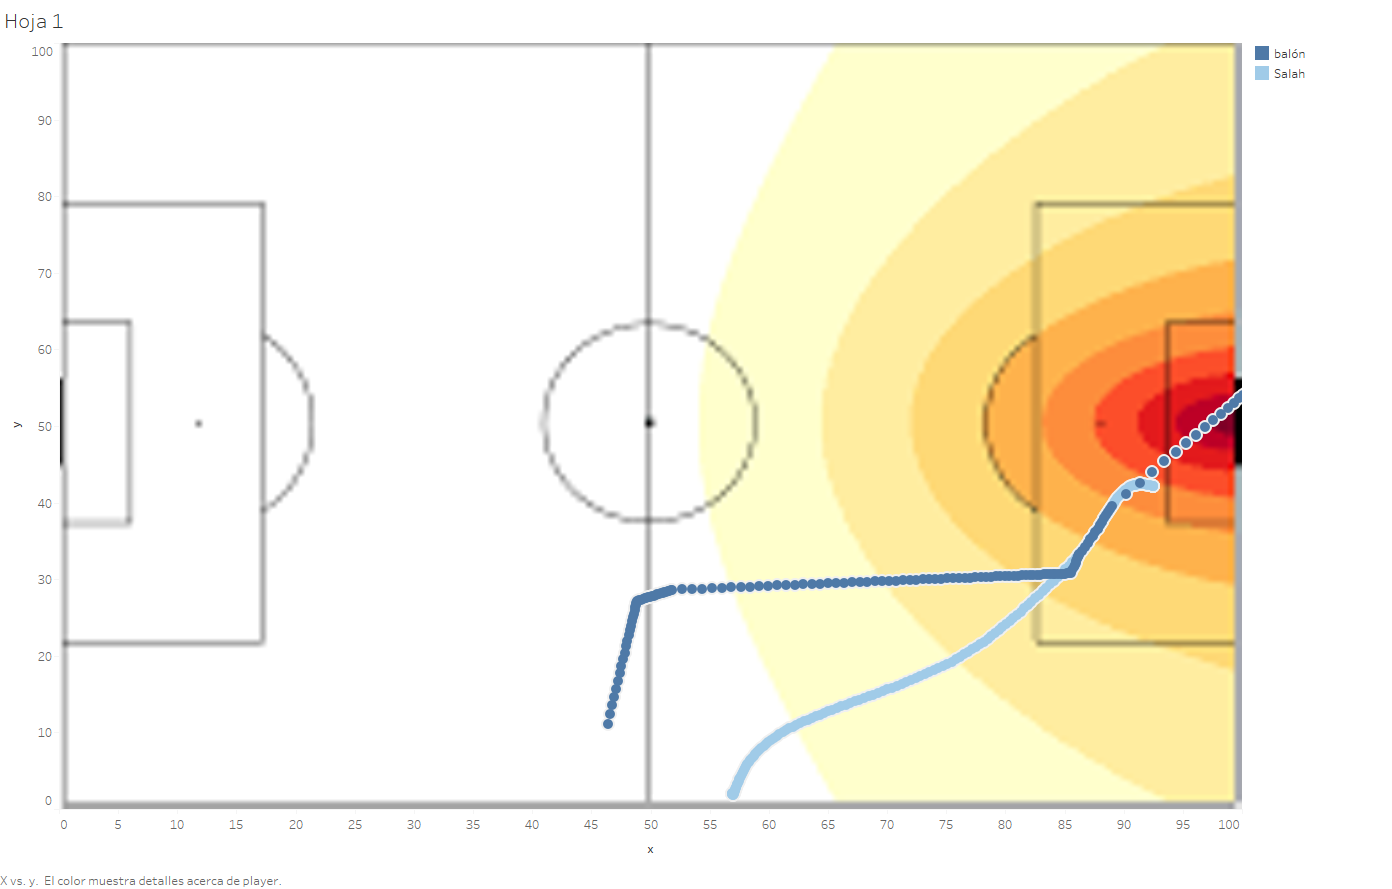